In [382]:
import pandas as pd
import csv
import os
import functools
from itertools import repeat
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [2]:
video_path = os.path.join("data", "video_data_2.csv")
video_df = pd.read_csv(video_path)
video_df

,Unnamed: 0,id,channelTitle,publishedAt,channelId,title,categoryId,description,tags,duration,...,caption,licensedContent,projection,viewCount,likeCount,favoriteCount,commentCount,Tag Count,Description Length (characters),Description Length (words)
0,0,2ruoagytC7w,PushToProd,2023-09-14T21:00:02Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Here’s the part 2 to my day in the life/ vlog!...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT7M22S,...,False,True,rectangular,1032,61.0,0,22.0,39.0,162,20
1,1,gBH1LdSZyFU,PushToProd,2023-09-04T22:27:11Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Hey Guys! \n\nHope you enjoy Part 1 of this da...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT14M8S,...,False,True,rectangular,2006,86.0,0,29.0,39.0,453,72
2,2,UhMJ0km4KLs,PushToProd,2023-08-15T21:30:03Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 6 | Is the end of tech near?,28,https://linktr.ee/pushtoprod\n\nHey push2prod ...,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT19M29S,...,False,True,rectangular,793,55.0,0,23.0,39.0,456,75
3,3,qYfxI07QrKo,PushToProd,2023-06-13T20:45:01Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 5 | Biology Degree to Data Scientist,28,"Hey push2prod squad. Welcome to back to the ""P...","['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT25M9S,...,False,True,rectangular,870,54.0,0,22.0,38.0,393,70
4,4,CKcYF3369LI,PushToProd,2023-06-07T14:00:10Z,UCN0u98NPeC0AW3pD6MbVeNg,From Suit & Tie to Bonnets and Durags: Embraci...,28,NaN,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT56S,...,False,True,rectangular,1679,36.0,0,3.0,38.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35293,35293,LMyFZVkJsLQ,Chris Sean,2017-01-14T05:43:23Z,UCu1xbgCV5o48h_BYCQD7KJg,All You NEED to BECOME A JUNIOR Web Developer ...,22,Learn to CODE in just a FEW months here: \n- M...,"['how to become a jr web developer', 'junior w...",PT9M,...,False,True,rectangular,192485,6246.0,0,504.0,18.0,336,36
35294,35294,rG3HPCGB4hU,Chris Sean,2017-01-09T16:45:08Z,UCu1xbgCV5o48h_BYCQD7KJg,"At The Office, Bad Day & Knowing Your Value | ...",22,Learn to CODE in just a FEW months here: \n- M...,"['daily life of a developer', 'the day in the ...",PT8M8S,...,False,True,rectangular,6810,197.0,0,25.0,14.0,336,36
35295,35295,HLgdtA-n_bo,Chris Sean,2016-12-30T00:38:56Z,UCu1xbgCV5o48h_BYCQD7KJg,What It Takes To Become A Web Developer in 2017,22,Learn to CODE in just a FEW months here: \n- M...,"['Learn code', 'html', 'php', 'css', 'jquery',...",PT7M35S,...,False,True,rectangular,7054,247.0,0,43.0,20.0,336,36
35296,35296,yAYJD4kKQ7c,Chris Sean,2016-12-22T17:12:12Z,UCu1xbgCV5o48h_BYCQD7KJg,Developers Q & A | Be Humble But Stay Competi...,22,Q & A | Be Humble But Stay Competitive \n\nNot...,"['developer q & a', 'how to become a developer...",PT14M,...,False,True,rectangular,3807,134.0,0,16.0,14.0,385,38


In [3]:
video_df.drop(columns=video_df.columns[0], axis=1, inplace=True)

In [4]:
video_df = video_df.drop_duplicates()

In [5]:
for index, row in video_df.iterrows(): # ongoing livestreams
    if "P0D" == row["duration"]:
        print(f"found {index}")
        video_df = video_df.drop([index])

found 105
found 460
found 803
found 804
found 934
found 1375
found 2160
found 2229
found 2581
found 3484
found 6534
found 7014
found 8155
found 8328
found 9093
found 19595
found 20655
found 20680
found 20688
found 20689
found 27662
found 28216
found 29006
found 29072
found 29254
found 29350
found 29382
found 31433
found 32539
found 33665
found 33768
found 33778
found 33994
found 34870
found 35008
found 35089
found 35104
found 35105
found 35128
found 35164
found 35183
found 35195
found 35197
found 35198
found 35204
found 35210
found 35211
found 35212
found 35220
found 35247
found 35248


In [6]:
video_df

,id,channelTitle,publishedAt,channelId,title,categoryId,description,tags,duration,dimension,...,caption,licensedContent,projection,viewCount,likeCount,favoriteCount,commentCount,Tag Count,Description Length (characters),Description Length (words)
0,2ruoagytC7w,PushToProd,2023-09-14T21:00:02Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Here’s the part 2 to my day in the life/ vlog!...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT7M22S,2d,...,False,True,rectangular,1032,61.0,0,22.0,39.0,162,20
1,gBH1LdSZyFU,PushToProd,2023-09-04T22:27:11Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Hey Guys! \n\nHope you enjoy Part 1 of this da...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT14M8S,2d,...,False,True,rectangular,2006,86.0,0,29.0,39.0,453,72
2,UhMJ0km4KLs,PushToProd,2023-08-15T21:30:03Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 6 | Is the end of tech near?,28,https://linktr.ee/pushtoprod\n\nHey push2prod ...,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT19M29S,2d,...,False,True,rectangular,793,55.0,0,23.0,39.0,456,75
3,qYfxI07QrKo,PushToProd,2023-06-13T20:45:01Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 5 | Biology Degree to Data Scientist,28,"Hey push2prod squad. Welcome to back to the ""P...","['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT25M9S,2d,...,False,True,rectangular,870,54.0,0,22.0,38.0,393,70
4,CKcYF3369LI,PushToProd,2023-06-07T14:00:10Z,UCN0u98NPeC0AW3pD6MbVeNg,From Suit & Tie to Bonnets and Durags: Embraci...,28,NaN,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT56S,2d,...,False,True,rectangular,1679,36.0,0,3.0,38.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35293,LMyFZVkJsLQ,Chris Sean,2017-01-14T05:43:23Z,UCu1xbgCV5o48h_BYCQD7KJg,All You NEED to BECOME A JUNIOR Web Developer ...,22,Learn to CODE in just a FEW months here: \n- M...,"['how to become a jr web developer', 'junior w...",PT9M,2d,...,False,True,rectangular,192485,6246.0,0,504.0,18.0,336,36
35294,rG3HPCGB4hU,Chris Sean,2017-01-09T16:45:08Z,UCu1xbgCV5o48h_BYCQD7KJg,"At The Office, Bad Day & Knowing Your Value | ...",22,Learn to CODE in just a FEW months here: \n- M...,"['daily life of a developer', 'the day in the ...",PT8M8S,2d,...,False,True,rectangular,6810,197.0,0,25.0,14.0,336,36
35295,HLgdtA-n_bo,Chris Sean,2016-12-30T00:38:56Z,UCu1xbgCV5o48h_BYCQD7KJg,What It Takes To Become A Web Developer in 2017,22,Learn to CODE in just a FEW months here: \n- M...,"['Learn code', 'html', 'php', 'css', 'jquery',...",PT7M35S,2d,...,False,True,rectangular,7054,247.0,0,43.0,20.0,336,36
35296,yAYJD4kKQ7c,Chris Sean,2016-12-22T17:12:12Z,UCu1xbgCV5o48h_BYCQD7KJg,Developers Q & A | Be Humble But Stay Competi...,22,Q & A | Be Humble But Stay Competitive \n\nNot...,"['developer q & a', 'how to become a developer...",PT14M,2d,...,False,True,rectangular,3807,134.0,0,16.0,14.0,385,38


In [7]:
for index, row in video_df.iterrows():
    if "DT51" in row["duration"]:
        print(row["duration"])
        print(row["title"])
        #video_df = video_df.drop([index])

P1DT51M37S
Harvard CS50 – Full Computer Science University Course
P1DT51M37S
Harvard CS50 – Full Computer Science University Course


In [8]:
new_duration = []
#count = 0
for index, row in video_df.iterrows():
    if index == 22632:
        new_duration.append(134201)
        continue
    prev_character = ""
    days = []
    hours = []
    minutes = []
    seconds = []
    m_found = False
    h_found = False
    h_exists = "H" in row["duration"]
    m_exists = "M" in row["duration"]
    d_exists = True if row["duration"][1] != "T" else False
    
    # Change tags to empty list if nan and tag count to 0
    # row["tags"] = [] if row["tags"] == None else None
    # row["Tag Count"] = 0 if row["tags"] == None else None
    
    if d_exists:
        days.append( row["duration"] [ (row["duration"].index("P") + 1) : row["duration"].index("T") - 1 ])

    for character in row["duration"][(row["duration"].index("T") + 1): -1]:
        
        if character != "H" and not h_found and h_exists:
            hours.append(character)  
        elif character == "H":
            h_found = True
        elif character != "M" and not m_found and m_exists:
            minutes.append(character)
        elif character == "M":
            m_found = True
        else:
            seconds.append(character)
    if not d_exists:
        days_count = 0
    else:
        days_count = int(functools.reduce(lambda x,y : x+y, days) if len(days) > 0 else 0)
    print(index) if len(days) > 0 else None
    hours_count = int(functools.reduce(lambda x,y : x+y, hours) if len(hours) > 0 else 0)
    minutes_count = int(functools.reduce(lambda x,y : x+y, minutes) if len(minutes) > 0 else 0)
    seconds_count = int(functools.reduce(lambda x,y : x+y, seconds) if len(seconds) > 0 else 0)
    
    time = (days_count * 24 + hours_count) * 3600 + minutes_count * 60 + seconds_count
    new_duration.append(time)
    # print(hours_count)
    # print(minutes_count)
    # print(seconds_count)
    # print(time)
video_df["Duration (seconds)"] = new_duration

6606
6702
6707
6755
6795
6798
15848
15944
15949
15997
16037


In [9]:
video_df["tags"].fillna('[]', inplace=True)
video_df["Tag Count"].fillna(0, inplace=True)

In [10]:
video_df[video_df["channelId"] == "UCUOMtzQmEmhIAF8G_cha_Xw"]

,id,channelTitle,publishedAt,channelId,title,categoryId,description,tags,duration,dimension,...,licensedContent,projection,viewCount,likeCount,favoriteCount,commentCount,Tag Count,Description Length (characters),Description Length (words),Duration (seconds)
1167,2LSPOgAtZeg,Dorian Develops,2023-10-17T17:34:18Z,UCUOMtzQmEmhIAF8G_cha_Xw,Physical Health is Mental Health 💪,27,My Resume & Cover Letter Bundle (https://sowl....,[],PT31S,2d,...,True,rectangular,1568,63.0,0,0.0,0.0,299,32,31
1168,ftUc1Zxr_Q4,Dorian Develops,2023-10-16T14:00:26Z,UCUOMtzQmEmhIAF8G_cha_Xw,I Turned Myself into a Business and It Made Me...,27,I productized myself and became a one-person b...,[],PT12M2S,2d,...,True,rectangular,3089,283.0,0,59.0,0.0,367,41,722
1169,7hv2bb4vxHQ,Dorian Develops,2023-10-14T22:38:40Z,UCUOMtzQmEmhIAF8G_cha_Xw,Morning Routines Are Out of Control!,27,I stumbled across the MOST RIDICULOUS morning ...,[],PT6M2S,2d,...,True,rectangular,3628,292.0,0,70.0,0.0,396,49,362
1170,RoguKNx--v8,Dorian Develops,2023-10-14T15:32:22Z,UCUOMtzQmEmhIAF8G_cha_Xw,Feeling LOST in your 20s? Advice I wish I had..,27,I had no direction in my 20s now I'm almost 40...,[],PT21M54S,2d,...,True,rectangular,3934,374.0,0,68.0,0.0,388,51,1314
1171,OLUSjr9oFTg,Dorian Develops,2023-10-13T18:18:11Z,UCUOMtzQmEmhIAF8G_cha_Xw,100 Burpees and a Cold Plunge at 9pm on a Thur...,27,Day 4 of me doing a 100 burpees everyday for 3...,[],PT9M43S,2d,...,True,rectangular,1390,68.0,0,23.0,0.0,459,65,583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10745,SG4NN8a9vFo,Dorian Develops,2020-10-21T21:01:32Z,UCUOMtzQmEmhIAF8G_cha_Xw,"Is A MacBook Pro The ""Best Laptop For Programm...",28,Zero To Mastery - Junior to Senior Web Develop...,"['self taught programmer', 'self taught web de...",PT10M34S,2d,...,True,rectangular,57425,1738.0,0,230.0,28.0,1604,159,634
10748,c3rbGRst23c,Dorian Develops,2020-10-06T07:11:55Z,UCUOMtzQmEmhIAF8G_cha_Xw,Do You Need To Know How To Type To Code? [Self...,27,Zero To Mastery - Junior to Senior Web Develop...,"['self taught programmer', 'self taught web de...",PT6M18S,2d,...,True,rectangular,2022,151.0,0,30.0,27.0,1604,159,378
10750,ZEEiHzMejRw,Dorian Develops,2020-09-18T12:30:07Z,UCUOMtzQmEmhIAF8G_cha_Xw,DON'T waste your time learning jQuery!!,27,Zero To Mastery - Junior to Senior Web Develop...,"['is jquery relevent in 2020', 'is jquery wort...",PT4M31S,2d,...,True,rectangular,67170,1334.0,0,213.0,25.0,1604,159,271
10754,215OB35uAhk,Dorian Develops,2020-09-02T15:44:00Z,UCUOMtzQmEmhIAF8G_cha_Xw,Is Coding For Me? Is Programming For Me? Here'...,27,Zero To Mastery - Junior to Senior Web Develop...,"['is coding for me', 'is programming for me', ...",PT8M3S,2d,...,True,rectangular,107709,4718.0,0,291.0,24.0,1604,159,483


In [11]:
bad_words = ["fitness", "health", "burpees", "morning routine", "Bitcoin", "Crypto", "Currency", "Football", "Laryngitis", "Vacation", "getaway", "roadtrip", "travel"]
dropped_df = pd.DataFrame()
for index, row in video_df.iterrows():
    for word in bad_words:
        if (word in row["title"] and row['channelTitle'] != "Nucamp") or row["title"] == "Dropped Football Data Analysis Project": # excluding Nucamp because they had guides on projects with some keywords listed here
            print(f"Dropped {row['title']} from {row['channelTitle']}")
            try:
                video_df = video_df.drop(index)
            except KeyError:
                print(index)

Dropped 10 jobs that let you travel the world from Shane Hummus
Dropped I Asked Chat-GPT About The Future of Crypto #crypto #shorts from Shane Hummus
Dropped Cryptocurrency INVESTING Mistakes To AVOID (Top 10 Beginner Investing Mistakes!) from Shane Hummus
Dropped I Tried Day Trading Bitcoin For 1 Week from Shane Hummus
Dropped 40F Cold Plunge Daily Grind 💪 #mentalhealth #dailyroutine #motivation #selfimprovement from Dorian Develops
Dropped Sunday Night Cold Plunge 🥶 #mentalhealth #dailyroutine #motivation #selfimprovement from Dorian Develops
Dropped Police travel 500 miles to KILL a little girl's pet goat for a BBQ from Dorian Develops
Dropped Forget Crypto.. Invest in THIS instead! from Dorian Develops
Dropped Be a man! NOBODY CARES about men's mental health! from Dorian Develops
Dropped Take care of your health.. Financial health, physical health and mental health! #Shorts from Dorian Develops
Dropped The stereotype of the remote tech worker traveling 😅. #tech #techjobs #technolog

In [12]:
video_df["channelTitle"].value_counts()

channelTitle
Simplilearn                                      6573
Stefan Mischook                                  2385
freeCodeCamp.org                                 1782
Jobskillshare Community                          1525
Degree Free                                      1242
IT Career Questions                              1036
Recruiter Preston                                1036
Black Heights - Advancing Your Career             897
Tech Is The New Black                             857
Shane Hummus                                      852
Tech With Emilio                                  698
Tiff In Tech                                      554
Coding with Lewis                                 514
Nucamp                                            419
Nishant Chahar                                    411
TechLead                                          398
Dorian Develops                                   395
Chris Sean                                        382
CareerFoundry  

In [13]:
type(video_df["tags"][0])

str

In [14]:
video_df.columns

Index(['id', 'channelTitle', 'publishedAt', 'channelId', 'title', 'categoryId',
       'description', 'tags', 'duration', 'dimension', 'definition', 'caption',
       'licensedContent', 'projection', 'viewCount', 'likeCount',
       'favoriteCount', 'commentCount', 'Tag Count',
       'Description Length (characters)', 'Description Length (words)',
       'Duration (seconds)'],
      dtype='object')

In [15]:
video_df.columns = ['id', 'Channel Title', 'Published At', 'Channel Id', 'Video Title', 'Category Id',
       'Description', 'Tags', 'Duration', 'Dimension', 'Definition', 'Caption',
       'LicensedContent', 'Projection', 'View Count', 'Like Count',
       'Favorite Count', 'Comment Count', 'Tag Count',
       'Description Length (characters)', 'Description Length (words)',
       'Duration (seconds)']

In [16]:
video_df.reset_index(inplace=True, drop=True)

In [17]:
video_df

,id,Channel Title,Published At,Channel Id,Video Title,Category Id,Description,Tags,Duration,Dimension,...,LicensedContent,Projection,View Count,Like Count,Favorite Count,Comment Count,Tag Count,Description Length (characters),Description Length (words),Duration (seconds)
0,2ruoagytC7w,PushToProd,2023-09-14T21:00:02Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Here’s the part 2 to my day in the life/ vlog!...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT7M22S,2d,...,True,rectangular,1032,61.0,0,22.0,39.0,162,20,442
1,gBH1LdSZyFU,PushToProd,2023-09-04T22:27:11Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Hey Guys! \n\nHope you enjoy Part 1 of this da...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT14M8S,2d,...,True,rectangular,2006,86.0,0,29.0,39.0,453,72,848
2,UhMJ0km4KLs,PushToProd,2023-08-15T21:30:03Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 6 | Is the end of tech near?,28,https://linktr.ee/pushtoprod\n\nHey push2prod ...,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT19M29S,2d,...,True,rectangular,793,55.0,0,23.0,39.0,456,75,1169
3,qYfxI07QrKo,PushToProd,2023-06-13T20:45:01Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 5 | Biology Degree to Data Scientist,28,"Hey push2prod squad. Welcome to back to the ""P...","['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT25M9S,2d,...,True,rectangular,870,54.0,0,22.0,38.0,393,70,1509
4,CKcYF3369LI,PushToProd,2023-06-07T14:00:10Z,UCN0u98NPeC0AW3pD6MbVeNg,From Suit & Tie to Bonnets and Durags: Embraci...,28,NaN,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT56S,2d,...,True,rectangular,1679,36.0,0,3.0,38.0,0,1,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26506,LMyFZVkJsLQ,Chris Sean,2017-01-14T05:43:23Z,UCu1xbgCV5o48h_BYCQD7KJg,All You NEED to BECOME A JUNIOR Web Developer ...,22,Learn to CODE in just a FEW months here: \n- M...,"['how to become a jr web developer', 'junior w...",PT9M,2d,...,True,rectangular,192485,6246.0,0,504.0,18.0,336,36,540
26507,rG3HPCGB4hU,Chris Sean,2017-01-09T16:45:08Z,UCu1xbgCV5o48h_BYCQD7KJg,"At The Office, Bad Day & Knowing Your Value | ...",22,Learn to CODE in just a FEW months here: \n- M...,"['daily life of a developer', 'the day in the ...",PT8M8S,2d,...,True,rectangular,6810,197.0,0,25.0,14.0,336,36,488
26508,HLgdtA-n_bo,Chris Sean,2016-12-30T00:38:56Z,UCu1xbgCV5o48h_BYCQD7KJg,What It Takes To Become A Web Developer in 2017,22,Learn to CODE in just a FEW months here: \n- M...,"['Learn code', 'html', 'php', 'css', 'jquery',...",PT7M35S,2d,...,True,rectangular,7054,247.0,0,43.0,20.0,336,36,455
26509,yAYJD4kKQ7c,Chris Sean,2016-12-22T17:12:12Z,UCu1xbgCV5o48h_BYCQD7KJg,Developers Q & A | Be Humble But Stay Competi...,22,Q & A | Be Humble But Stay Competitive \n\nNot...,"['developer q & a', 'how to become a developer...",PT14M,2d,...,True,rectangular,3807,134.0,0,16.0,14.0,385,38,840


In [18]:
type(video_df["Category Id"][0])

numpy.int64

In [19]:
video_df.to_csv('data/video_data_cleaned.csv')  

In [20]:
video_df["Category Id"].value_counts()

Category Id
27    16951
28     4516
22     3288
24     1366
26      322
1        43
23       15
17        5
25        3
2         1
10        1
Name: count, dtype: int64

In [43]:
video_df["Publish Date"] = video_df["Published At"].str[:10]

In [53]:
format = '%Y-%m-%d'
start_date = datetime.datetime.strptime('2019-01-01', format)
print(start_date)

2019-01-01 00:00:00


In [58]:
video_df['Publish Date'] = pd.to_datetime(video_df['Publish Date'])

In [64]:
video_df['Publish Date'][0]

Timestamp('2023-09-14 00:00:00')

In [62]:
# # format = '%Y-%m-%d'
# # start_date = datetime.datetime.strptime('2019-01-01', format)
# for index, row in video_df.iterrows():
#     row["Publish Date"] = datetime.datetime.strptime(row["Publish Date"], format)
#     if row["Publish Date"] < start_date:
#         video_df.drop(index, inplace=True)
#     # if index % 1000 == 0:
#     #     print(row[])

In [65]:
video_df

,id,Channel Title,Published At,Channel Id,Video Title,Category Id,Description,Tags,Duration,Dimension,...,Projection,View Count,Like Count,Favorite Count,Comment Count,Tag Count,Description Length (characters),Description Length (words),Duration (seconds),Publish Date
0,2ruoagytC7w,PushToProd,2023-09-14T21:00:02Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Here’s the part 2 to my day in the life/ vlog!...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT7M22S,2d,...,rectangular,1032,61.0,0,22.0,39.0,162,20,442,2023-09-14
1,gBH1LdSZyFU,PushToProd,2023-09-04T22:27:11Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Hey Guys! \n\nHope you enjoy Part 1 of this da...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT14M8S,2d,...,rectangular,2006,86.0,0,29.0,39.0,453,72,848,2023-09-04
2,UhMJ0km4KLs,PushToProd,2023-08-15T21:30:03Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 6 | Is the end of tech near?,28,https://linktr.ee/pushtoprod\n\nHey push2prod ...,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT19M29S,2d,...,rectangular,793,55.0,0,23.0,39.0,456,75,1169,2023-08-15
3,qYfxI07QrKo,PushToProd,2023-06-13T20:45:01Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 5 | Biology Degree to Data Scientist,28,"Hey push2prod squad. Welcome to back to the ""P...","['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT25M9S,2d,...,rectangular,870,54.0,0,22.0,38.0,393,70,1509,2023-06-13
4,CKcYF3369LI,PushToProd,2023-06-07T14:00:10Z,UCN0u98NPeC0AW3pD6MbVeNg,From Suit & Tie to Bonnets and Durags: Embraci...,28,NaN,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT56S,2d,...,rectangular,1679,36.0,0,3.0,38.0,0,1,56,2023-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26249,Uceilu2rtPk,Chris Sean,2019-01-28T11:26:47Z,UCu1xbgCV5o48h_BYCQD7KJg,Self-taught Web Developers Still Needed in 201...,22,Learn to CODE in just a FEW months here: \n- M...,"['learn', 'code', 'life', 'of', 'web', 'develo...",PT7M24S,2d,...,rectangular,35208,1628.0,0,469.0,24.0,336,36,444,2019-01-28
26250,if6wCZyXJoE,Chris Sean,2019-01-23T16:33:39Z,UCu1xbgCV5o48h_BYCQD7KJg,My Junior Web Developer Salary - Revealed | #d...,22,Learn to CODE in just a FEW months here: \n- M...,"['learn', 'code', 'life', 'of', 'web', 'develo...",PT11M25S,2d,...,rectangular,112850,2801.0,0,567.0,28.0,336,36,685,2019-01-23
26251,STBfJpMTY34,Chris Sean,2019-01-18T17:18:30Z,UCu1xbgCV5o48h_BYCQD7KJg,Learning Code - The Hardest Thing You’ll Ever Do,22,Learn to CODE in just a FEW months here: \n- M...,"['learn', 'code', 'life', 'of', 'web', 'develo...",PT5M51S,2d,...,rectangular,20319,1076.0,0,131.0,24.0,336,36,351,2019-01-18
26252,DYbobFIgig0,Chris Sean,2019-01-11T02:01:05Z,UCu1xbgCV5o48h_BYCQD7KJg,I Am Not A REAL Web Developer | #devsLife,22,Learn to CODE in just a FEW months here: \n- M...,"['learn', 'code', 'life', 'of', 'web', 'develo...",PT8M33S,2d,...,rectangular,10913,631.0,0,181.0,24.0,336,36,513,2019-01-11


In [66]:
video_df.to_csv('data/video_data_cleaned.csv')

In [67]:
covid_path = os.path.join("data", "covid_vaccines_by_county_cleaned.csv")
covid_df = pd.read_csv(covid_path)
covid_df

,county,administered_date,total_doses,cumulative_total_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,up_to_date_count,cumulative_up_to_date_count,population,fully_vaccinated_rate,one_dose_rate,up_to_date_rate
0,Alameda,2020-01-05,0,0,0,0,0,0,0,0,0,0,"1,680,380",0.00%,0.00%,0.00%
1,Alameda,2020-07-27,0,0,0,0,0,0,0,0,0,0,"1,680,380",0.00%,0.00%,0.00%
2,Alameda,2020-07-29,0,1,0,1,0,0,0,1,0,0,"1,680,380",0.00%,0.00%,0.00%
3,Alameda,2020-07-30,0,1,0,1,0,0,0,1,0,0,"1,680,380",0.00%,0.00%,0.00%
4,Alameda,2020-07-31,0,1,0,1,0,0,0,1,0,0,"1,680,380",0.00%,0.00%,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69438,Yuba,2023-10-11,86,111512,2,4238,0,40347,2,44591,54,7273,84401,47.80%,52.83%,8.62%
69439,Yuba,2023-10-12,87,111599,3,4241,0,40347,3,44594,53,7326,84401,47.80%,52.84%,8.68%
69440,Yuba,2023-10-13,71,111670,2,4243,0,40347,2,44596,53,7379,84401,47.80%,52.84%,8.74%
69441,Yuba,2023-10-14,39,111709,0,4243,0,40347,0,44596,24,7403,84401,47.80%,52.84%,8.77%


In [71]:
covid_df["administered_date"] = pd.to_datetime(covid_df["administered_date"])
covid_df["administered_date"][0].month

1

In [99]:
covid_df['administered_date_s'] = covid_df['administered_date'].shift(-1)
# df['t_s'] = df['t'].shift(-1)
# df['z_s'] = df['z'].shift(-1)

In [100]:
covid_df

,county,administered_date,total_doses,cumulative_total_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,up_to_date_count,cumulative_up_to_date_count,population,fully_vaccinated_rate,one_dose_rate,up_to_date_rate,administered_date_s
0,Alameda,2020-01-05,0,0,0,0,0,0,0,0,0,0,"1,680,380",0.00%,0.00%,0.00%,2020-07-27
1,Alameda,2020-07-27,0,0,0,0,0,0,0,0,0,0,"1,680,380",0.00%,0.00%,0.00%,2020-07-29
2,Alameda,2020-07-29,0,1,0,1,0,0,0,1,0,0,"1,680,380",0.00%,0.00%,0.00%,2020-07-30
3,Alameda,2020-07-30,0,1,0,1,0,0,0,1,0,0,"1,680,380",0.00%,0.00%,0.00%,2020-07-31
4,Alameda,2020-07-31,0,1,0,1,0,0,0,1,0,0,"1,680,380",0.00%,0.00%,0.00%,2020-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69438,Yuba,2023-10-11,86,111512,2,4238,0,40347,2,44591,54,7273,84401,47.80%,52.83%,8.62%,2023-10-12
69439,Yuba,2023-10-12,87,111599,3,4241,0,40347,3,44594,53,7326,84401,47.80%,52.84%,8.68%,2023-10-13
69440,Yuba,2023-10-13,71,111670,2,4243,0,40347,2,44596,53,7379,84401,47.80%,52.84%,8.74%,2023-10-14
69441,Yuba,2023-10-14,39,111709,0,4243,0,40347,0,44596,24,7403,84401,47.80%,52.84%,8.77%,2023-10-15


In [114]:
rates_by_month_df = pd.DataFrame()
for index, row in covid_df.iterrows():
    if row["administered_date"].month != row["administered_date_s"].month:
        row_to_add = {"County": row["county"], "Year": row["administered_date"].year, "Month": row["administered_date"].month, "Fully Vaccinated Rate": row["fully_vaccinated_rate"], "One Dose Rate": row["one_dose_rate"], "Up To Date Rate": row["up_to_date_rate"],}
        rates_by_month_df = pd.concat( [ rates_by_month_df, pd.DataFrame.from_records([row_to_add]) ], ignore_index=True )
        #rates_by_month_df = rates_by_month_df.append({"County": row["County"], "Year": row["administered_date"].year, "Month": row["administered_date"].month})
        #print(f"end of month {row['administered_date']}, {row['fully_vaccinated_rate']}")

In [112]:
#rates_by_month_df['Month_s'] = rates_by_month_df['Month'].shift(-1)

In [116]:
rates_by_month_df["County"].value_counts()

County
Modoc              77
Sierra             76
Alpine             74
Inyo               72
Trinity            69
Plumas             68
Del Norte          67
Mariposa           66
Lassen             66
Siskiyou           65
Mono               65
Glenn              62
Colusa             60
Lake               59
Amador             59
Tuolumne           58
Tehama             57
Mendocino          55
Shasta             54
Kings              53
Madera             53
Yuba               53
San Benito         52
Calaveras          52
Nevada             51
Yolo               50
Santa Cruz         50
Sutter             50
Humboldt           49
Butte              49
Ventura            48
El Dorado          48
Stanislaus         48
Merced             47
San Joaquin        47
Imperial           47
Santa Clara        47
San Mateo          47
San Luis Obispo    47
San Bernardino     47
Sacramento         47
Riverside          47
Placer             47
Napa               47
Fresno             47
Sol

In [140]:
rates_by_month_df['Fully Vaccinated Rate'] = rates_by_month_df['Fully Vaccinated Rate'].str.rstrip('%').astype('float') / 100.0
rates_by_month_df['One Dose Rate'] = rates_by_month_df['One Dose Rate'].str.rstrip('%').astype('float') / 100.0
rates_by_month_df['Up To Date Rate'] = rates_by_month_df['Up To Date Rate'].str.rstrip('%').astype('float') / 100.0

In [143]:
rates_by_month_df.dtypes

County                    object
Year                       int64
Month                      int64
Fully Vaccinated Rate    float64
One Dose Rate            float64
Up To Date Rate          float64
dtype: object

In [146]:
rates_by_month_df

,County,Year,Month,Fully Vaccinated Rate,One Dose Rate,Up To Date Rate
0,Alameda,2020,1,0.000,0.0000,0.0000
1,Alameda,2020,7,0.000,0.0000,0.0000
2,Alameda,2020,8,0.000,0.0000,0.0000
3,Alameda,2020,9,0.000,0.0000,0.0000
4,Alameda,2020,10,0.000,0.0000,0.0000
...,...,...,...,...,...,...
3127,Yuba,2023,6,0.478,0.5271,0.0740
3128,Yuba,2023,7,0.478,0.5274,0.0749
3129,Yuba,2023,8,0.478,0.5277,0.0764
3130,Yuba,2023,9,0.478,0.5280,0.0809


In [144]:
rates_by_month_df.to_csv('data/vaccination_rates_by_month_per_county.csv')

In [217]:
california_df = rates_by_month_df[rates_by_month_df["County"] == "All CA Counties"]

In [224]:
empty_df = pd.DataFrame( {"County": list(repeat("All CA Counties", 17)), "Year": list(repeat(2019, 12))+ list(repeat(2020, 5)), "Month": [1,2,3,4,5,6,7,8,9,10,11,12,2,3,4,5,6], "Fully Vaccinated Rate": list(repeat(float(0.0000), 17)), "One Dose Rate": list(repeat(float(0.0000), 17)), "Up To Date Rate": list(repeat(float(0.0000), 17)) } )

In [219]:
# https://stackoverflow.com/questions/71767087/concat-dataframes-using-rows-from-second-dataframe-which-dont-exist-in-first-da

cols = ["County", "Year", "Month", "Fully Vaccinated Rate", "One Dose Rate", "Up To Date Rate"]
df2_only = (california_df[cols]
            .merge(empty_df, on=cols, indicator=True, how='right')
            .query('_merge == "right_only"').drop(columns='_merge')
           )

california_df = pd.concat([california_df, df2_only])

In [220]:
california_df = california_df.sort_values(["Year", "Month"])

In [225]:
california_df.to_csv('data/vaccination_rates_by_month_california.csv')

In [229]:
video_df["Month"] = video_df["Publish Date"].dt.month
video_df["Year"] = video_df["Publish Date"].dt.year

In [231]:
video_df = pd.merge(video_df, california_df, on=['Year', 'Month'], how='left')
video_df = video_df.drop(['County'], axis=1)

In [238]:
video_df.rename(columns={"Fully Vaccinated Rate": "Fully Vaccinated Rate (California)", "One Dose Rate": "One Dose Rate (California)", "Up To Date Rate": "Up To Date Rate (California)"})

,id,Channel Title,Published At,Channel Id,Video Title,Category Id,Description,Tags,Duration,Dimension,...,Tag Count,Description Length (characters),Description Length (words),Duration (seconds),Publish Date,Month,Year,Fully Vaccinated Rate (California),One Dose Rate (California),Up To Date Rate (California)
0,2ruoagytC7w,PushToProd,2023-09-14T21:00:02Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Here’s the part 2 to my day in the life/ vlog!...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT7M22S,2d,...,39.0,162,20,442,2023-09-14,9,2023,0.7144,0.7952,0.1918
1,gBH1LdSZyFU,PushToProd,2023-09-04T22:27:11Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Hey Guys! \n\nHope you enjoy Part 1 of this da...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT14M8S,2d,...,39.0,453,72,848,2023-09-04,9,2023,0.7144,0.7952,0.1918
2,UhMJ0km4KLs,PushToProd,2023-08-15T21:30:03Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 6 | Is the end of tech near?,28,https://linktr.ee/pushtoprod\n\nHey push2prod ...,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT19M29S,2d,...,39.0,456,75,1169,2023-08-15,8,2023,0.7144,0.7946,0.1809
3,qYfxI07QrKo,PushToProd,2023-06-13T20:45:01Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 5 | Biology Degree to Data Scientist,28,"Hey push2prod squad. Welcome to back to the ""P...","['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT25M9S,2d,...,38.0,393,70,1509,2023-06-13,6,2023,0.7143,0.7933,0.1734
4,CKcYF3369LI,PushToProd,2023-06-07T14:00:10Z,UCN0u98NPeC0AW3pD6MbVeNg,From Suit & Tie to Bonnets and Durags: Embraci...,28,NaN,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT56S,2d,...,38.0,0,1,56,2023-06-07,6,2023,0.7143,0.7933,0.1734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20738,Uceilu2rtPk,Chris Sean,2019-01-28T11:26:47Z,UCu1xbgCV5o48h_BYCQD7KJg,Self-taught Web Developers Still Needed in 201...,22,Learn to CODE in just a FEW months here: \n- M...,"['learn', 'code', 'life', 'of', 'web', 'develo...",PT7M24S,2d,...,24.0,336,36,444,2019-01-28,1,2019,0.0000,0.0000,0.0000
20739,if6wCZyXJoE,Chris Sean,2019-01-23T16:33:39Z,UCu1xbgCV5o48h_BYCQD7KJg,My Junior Web Developer Salary - Revealed | #d...,22,Learn to CODE in just a FEW months here: \n- M...,"['learn', 'code', 'life', 'of', 'web', 'develo...",PT11M25S,2d,...,28.0,336,36,685,2019-01-23,1,2019,0.0000,0.0000,0.0000
20740,STBfJpMTY34,Chris Sean,2019-01-18T17:18:30Z,UCu1xbgCV5o48h_BYCQD7KJg,Learning Code - The Hardest Thing You’ll Ever Do,22,Learn to CODE in just a FEW months here: \n- M...,"['learn', 'code', 'life', 'of', 'web', 'develo...",PT5M51S,2d,...,24.0,336,36,351,2019-01-18,1,2019,0.0000,0.0000,0.0000
20741,DYbobFIgig0,Chris Sean,2019-01-11T02:01:05Z,UCu1xbgCV5o48h_BYCQD7KJg,I Am Not A REAL Web Developer | #devsLife,22,Learn to CODE in just a FEW months here: \n- M...,"['learn', 'code', 'life', 'of', 'web', 'develo...",PT8M33S,2d,...,24.0,336,36,513,2019-01-11,1,2019,0.0000,0.0000,0.0000


In [239]:
video_df = video_df.drop(['id', 'Channel Id', 'Duration', 'Dimension'], axis=1)

In [240]:
video_df

,Channel Title,Published At,Video Title,Category Id,Description,Tags,Definition,Caption,LicensedContent,Projection,...,Tag Count,Description Length (characters),Description Length (words),Duration (seconds),Publish Date,Month,Year,Fully Vaccinated Rate,One Dose Rate,Up To Date Rate
0,PushToProd,2023-09-14T21:00:02Z,day in the life | Jr. Cybersecurity Engineer N...,28,Here’s the part 2 to my day in the life/ vlog!...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",hd,False,True,rectangular,...,39.0,162,20,442,2023-09-14,9,2023,0.7144,0.7952,0.1918
1,PushToProd,2023-09-04T22:27:11Z,day in the life | Jr. Cybersecurity Engineer N...,28,Hey Guys! \n\nHope you enjoy Part 1 of this da...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",hd,False,True,rectangular,...,39.0,453,72,848,2023-09-04,9,2023,0.7144,0.7952,0.1918
2,PushToProd,2023-08-15T21:30:03Z,Prodcast 6 | Is the end of tech near?,28,https://linktr.ee/pushtoprod\n\nHey push2prod ...,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",hd,False,True,rectangular,...,39.0,456,75,1169,2023-08-15,8,2023,0.7144,0.7946,0.1809
3,PushToProd,2023-06-13T20:45:01Z,Prodcast 5 | Biology Degree to Data Scientist,28,"Hey push2prod squad. Welcome to back to the ""P...","['podcast', 'devops', 'azure', 'aws', 'cloud',...",hd,False,True,rectangular,...,38.0,393,70,1509,2023-06-13,6,2023,0.7143,0.7933,0.1734
4,PushToProd,2023-06-07T14:00:10Z,From Suit & Tie to Bonnets and Durags: Embraci...,28,NaN,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",hd,False,True,rectangular,...,38.0,0,1,56,2023-06-07,6,2023,0.7143,0.7933,0.1734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20738,Chris Sean,2019-01-28T11:26:47Z,Self-taught Web Developers Still Needed in 201...,22,Learn to CODE in just a FEW months here: \n- M...,"['learn', 'code', 'life', 'of', 'web', 'develo...",hd,False,True,rectangular,...,24.0,336,36,444,2019-01-28,1,2019,0.0000,0.0000,0.0000
20739,Chris Sean,2019-01-23T16:33:39Z,My Junior Web Developer Salary - Revealed | #d...,22,Learn to CODE in just a FEW months here: \n- M...,"['learn', 'code', 'life', 'of', 'web', 'develo...",hd,False,True,rectangular,...,28.0,336,36,685,2019-01-23,1,2019,0.0000,0.0000,0.0000
20740,Chris Sean,2019-01-18T17:18:30Z,Learning Code - The Hardest Thing You’ll Ever Do,22,Learn to CODE in just a FEW months here: \n- M...,"['learn', 'code', 'life', 'of', 'web', 'develo...",hd,False,True,rectangular,...,24.0,336,36,351,2019-01-18,1,2019,0.0000,0.0000,0.0000
20741,Chris Sean,2019-01-11T02:01:05Z,I Am Not A REAL Web Developer | #devsLife,22,Learn to CODE in just a FEW months here: \n- M...,"['learn', 'code', 'life', 'of', 'web', 'develo...",hd,False,True,rectangular,...,24.0,336,36,513,2019-01-11,1,2019,0.0000,0.0000,0.0000


In [241]:
video_df.to_csv('data/youtube_with_covid.csv')

In [243]:
video_df.columns

Index(['Channel Title', 'Published At', 'Video Title', 'Category Id',
       'Description', 'Tags', 'Definition', 'Caption', 'LicensedContent',
       'Projection', 'View Count', 'Like Count', 'Favorite Count',
       'Comment Count', 'Tag Count', 'Description Length (characters)',
       'Description Length (words)', 'Duration (seconds)', 'Publish Date',
       'Month', 'Year', 'Fully Vaccinated Rate', 'One Dose Rate',
       'Up To Date Rate'],
      dtype='object')

In [250]:
bootcamp_df = video_df[(video_df['Tags'].str.contains('bootcamp'))] 

In [252]:
video_df['Description'].fillna("")

0        Here’s the part 2 to my day in the life/ vlog!...
1        Hey Guys! \n\nHope you enjoy Part 1 of this da...
2        https://linktr.ee/pushtoprod\n\nHey push2prod ...
3        Hey push2prod squad. Welcome to back to the "P...
4                                                         
                               ...                        
20738    Learn to CODE in just a FEW months here: \n- M...
20739    Learn to CODE in just a FEW months here: \n- M...
20740    Learn to CODE in just a FEW months here: \n- M...
20741    Learn to CODE in just a FEW months here: \n- M...
20742    Learn to CODE in just a FEW months here: \n- M...
Name: Description, Length: 20743, dtype: object

In [247]:
bootcamp_df

,Channel Title,Published At,Video Title,Category Id,Description,Tags,Definition,Caption,LicensedContent,Projection,...,Tag Count,Description Length (characters),Description Length (words),Duration (seconds),Publish Date,Month,Year,Fully Vaccinated Rate,One Dose Rate,Up To Date Rate
27,PushToProd,2021-11-10T21:55:44Z,Get CLOUD certified in 1 MONTH,27,How I passed my Microsoft Certified Solutions ...,"['Software', 'Networking', 'NOC', 'network ana...",hd,False,True,rectangular,...,35.0,137,21,767,2021-11-10,11,2021,0.6516,0.7195,0.0000
28,PushToProd,2021-11-03T21:00:13Z,Getting into Tech | New Grad | Solutions Engineer,27,Hey Push to Prod Squad. Today I am interviewin...,"['Software', 'Networking', 'NOC', 'network ana...",hd,False,True,rectangular,...,35.0,276,48,668,2021-11-03,11,2021,0.6516,0.7195,0.0000
158,Shane Hummus,2023-02-19T00:00:02Z,How To Get A BS Cloud Computing (Multi-Cloud) ...,27,BS Cloud Computing (Multi-Cloud) Degree WGU M...,"['Shane', 'Hummus', 'Shane Hummus', 'western g...",hd,False,True,rectangular,...,21.0,1168,175,943,2023-02-19,2,2023,0.7135,0.7902,0.1506
176,Shane Hummus,2023-02-01T00:00:09Z,How Joseph Landed A Tech Sales Job In 1.5 Mont...,27,Troy’s Tech Sales Free Training (Get $50 off u...,"['Shane', 'Hummus', 'Shane Hummus', 'tech sale...",hd,False,True,rectangular,...,24.0,1066,167,1174,2023-02-01,2,2023,0.7135,0.7902,0.1506
184,Shane Hummus,2023-01-24T00:00:13Z,How A Busy Husband And Wife Both Landed Tech J...,27,Troy’s Tech Sales Free Training:\nhttps://cour...,"['Shane', 'Shane Hummus', 'finance tips', 'car...",hd,False,True,rectangular,...,23.0,1038,162,1152,2023-01-24,1,2023,0.7131,0.7893,0.1446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20347,Black Heights - Advancing Your Career,2022-01-15T18:15:00Z,Bootcamp vs College Degree to get into TECH,27,Bootcamp vs College Degree to get into TECH\n\...,['Bootcamp vs College Degree to get into TECH'...,hd,False,True,rectangular,...,24.0,1938,172,1007,2022-01-15,1,2022,0.6978,0.7664,0.0001
20372,Black Heights - Advancing Your Career,2021-12-24T18:00:26Z,Tech Contractors Are Paid More But Don't Expec...,27,Tech Contractors Are Paid More But Don't Expec...,"[""Tech Contractors Are Paid More But Don't Exp...",hd,False,True,rectangular,...,26.0,2389,253,663,2021-12-24,12,2021,0.6789,0.7434,0.0000
20390,Black Heights - Advancing Your Career,2021-12-07T18:00:25Z,Coding Bootcamps - Transition from Military ...,27,Coding Bootcamps - Transition from Military ...,['coding bootcamps - transition from military ...,hd,False,True,rectangular,...,23.0,2288,233,979,2021-12-07,12,2021,0.6789,0.7434,0.0000
20404,Black Heights - Advancing Your Career,2021-11-27T11:58:23Z,How much can you earn working for Adobe? | Lan...,27,How much can you earn working for Adobe? | Lan...,['How much can you earn working for Adobe? | L...,hd,False,True,rectangular,...,23.0,1948,181,4936,2021-11-27,11,2021,0.6516,0.7195,0.0000


In [248]:
bootcamp_df['Channel Title'].value_counts()

Channel Title
Tech Is The New Black                    694
Nucamp                                   346
Simplilearn                              186
Tiff In Tech                              39
Black Heights - Advancing Your Career     26
Shane Hummus                              14
CareerFoundry                             14
Cut The Tech                              13
Sandra - Tech & Lifestyle                 12
Dorian Develops                           10
My Lesson                                 10
Internet Made Coder                        9
Hustle With Drae                           7
Jeremiah Peoples                           7
thedevlife                                 6
Tech With Emilio                           5
Peter Elbaum                               4
Alex The Analyst                           4
TechLead                                   4
Rahul Pandey                               4
Devslopes                                  3
Recruiter Preston                        

In [255]:
# top channels
video_df["Channel Title"].value_counts()

Channel Title
Simplilearn                                      5194
Degree Free                                      1242
Recruiter Preston                                1036
Stefan Mischook                                   989
freeCodeCamp.org                                  937
Black Heights - Advancing Your Career             888
Tech Is The New Black                             856
Shane Hummus                                      852
Jobskillshare Community                           777
Tiff In Tech                                      541
Coding with Lewis                                 514
IT Career Questions                               433
Nucamp                                            417
Nishant Chahar                                    411
Dorian Develops                                   395
Tech With Emilio                                  382
Sandra - Tech & Lifestyle                         354
TechLead                                          341
CareerFoundry 

In [256]:
# check to make sure top 5 have been posting since 2019
vids_by_year = video_df.groupby(["Channel Title", "Year"])

In [259]:
print(vids_by_year)

In [266]:
vids_by_year.get_group(("Simplilearn", 2019)).head(1)

,Channel Title,Published At,Video Title,Category Id,Description,Tags,Definition,Caption,LicensedContent,Projection,...,Tag Count,Description Length (characters),Description Length (words),Duration (seconds),Publish Date,Month,Year,Fully Vaccinated Rate,One Dose Rate,Up To Date Rate
13704,Simplilearn,2019-12-27T11:30:00Z,Success Story | Story of Sameer Gupta-IT Proje...,27,🔥Become ITIL Professional Today: https://tapli...,"['upskill', 'upskill courses', 'upskilling and...",hd,False,False,rectangular,...,20.0,3680,426,138,2019-12-27,12,2019,0.0,0.0,0.0


In [270]:
vids_by_year.get_group(("Stefan Mischook", 2019)).head(1)

,Channel Title,Published At,Video Title,Category Id,Description,Tags,Definition,Caption,LicensedContent,Projection,...,Tag Count,Description Length (characters),Description Length (words),Duration (seconds),Publish Date,Month,Year,Fully Vaccinated Rate,One Dose Rate,Up To Date Rate
3568,Stefan Mischook,2019-12-31T12:00:07Z,The Developers Journey - the First 3 Years,27,What are the first 3 years of a developers car...,"['programmercareer', 'developercareer']",hd,False,True,rectangular,...,2.0,837,68,1210,2019-12-31,12,2019,0.0,0.0,0.0


In [271]:
vids_by_year.get_group(("freeCodeCamp.org", 2019)).head(1) 

,Channel Title,Published At,Video Title,Category Id,Description,Tags,Definition,Caption,LicensedContent,Projection,...,Tag Count,Description Length (characters),Description Length (words),Duration (seconds),Publish Date,Month,Year,Fully Vaccinated Rate,One Dose Rate,Up To Date Rate
5558,freeCodeCamp.org,2019-12-23T16:56:34Z,AWS Certified Solutions Architect - Associate ...,27,AWS Certified Solutions Architect is one of th...,"['aws tutorial for beginners', 'aws certified ...",hd,True,True,rectangular,...,16.0,1309,154,37579,2019-12-23,12,2019,0.0,0.0,0.0


In [272]:
vids_by_year.get_group(("Black Heights - Advancing Your Career", 2019)).head(1)  

,Channel Title,Published At,Video Title,Category Id,Description,Tags,Definition,Caption,LicensedContent,Projection,...,Tag Count,Description Length (characters),Description Length (words),Duration (seconds),Publish Date,Month,Year,Fully Vaccinated Rate,One Dose Rate,Up To Date Rate
20599,Black Heights - Advancing Your Career,2019-09-26T01:46:30Z,Lenny Lawrence Takes Us On His Journey | Entre...,27,Lenny Lawrence Takes Us On His Journey and dis...,"['#leadership', '#entrepreneurship', '#blackhe...",hd,False,True,rectangular,...,3.0,1041,104,4257,2019-09-26,9,2019,0.0,0.0,0.0


In [274]:
vids_by_year.get_group(("Shane Hummus", 2019)).head(1)

,Channel Title,Published At,Video Title,Category Id,Description,Tags,Definition,Caption,LicensedContent,Projection,...,Tag Count,Description Length (characters),Description Length (words),Duration (seconds),Publish Date,Month,Year,Fully Vaccinated Rate,One Dose Rate,Up To Date Rate
792,Shane Hummus,2019-12-26T22:00:01Z,5000 subscribers + update,27,📈 My Investments/Buy And Sell Alerts/Exclusive...,"['Shane', 'Hummus', 'Shane Hummus', '5000 SUBS...",hd,False,True,rectangular,...,8.0,1923,246,309,2019-12-26,12,2019,0.0,0.0,0.0


In [459]:
# the channels with the most views that have been postin gsince 2019
original_top_5 = video_df[(video_df["Channel Title"] == "Simplilearn") | (video_df["Channel Title"] == "Stefan Mischook") | (video_df["Channel Title"] == "freeCodeCamp.org") | (video_df["Channel Title"] == "Black Heights - Advancing Your Career") | (video_df["Channel Title"] == "Shane Hummus")]

In [286]:
california_df['Date'] = pd.to_datetime(california_df[['Year', 'Month']].assign(day=1))
california_df.set_index('Date', inplace=True)

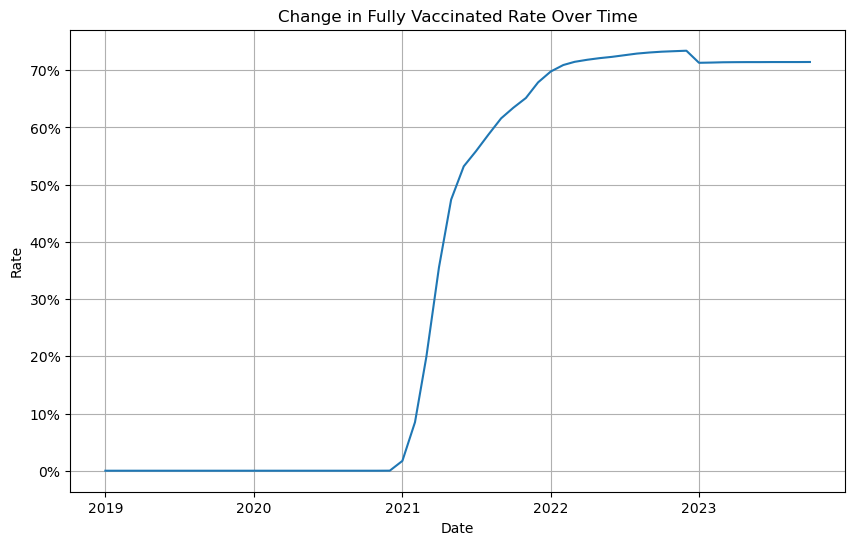

In [296]:
plt.figure(figsize=(10, 6))


ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # 1.0 means 100%

plt.plot(california_df['Fully Vaccinated Rate'])
plt.title('Change in Fully Vaccinated Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.grid(True)
plt.show()

In [299]:
video_df.columns

Index(['Channel Title', 'Published At', 'Video Title', 'Category Id',
       'Description', 'Tags', 'Definition', 'Caption', 'LicensedContent',
       'Projection', 'View Count', 'Like Count', 'Favorite Count',
       'Comment Count', 'Tag Count', 'Description Length (characters)',
       'Description Length (words)', 'Duration (seconds)', 'Publish Date',
       'Month', 'Year', 'Fully Vaccinated Rate', 'One Dose Rate',
       'Up To Date Rate'],
      dtype='object')

In [317]:
type(average_views)

pandas.core.series.Series

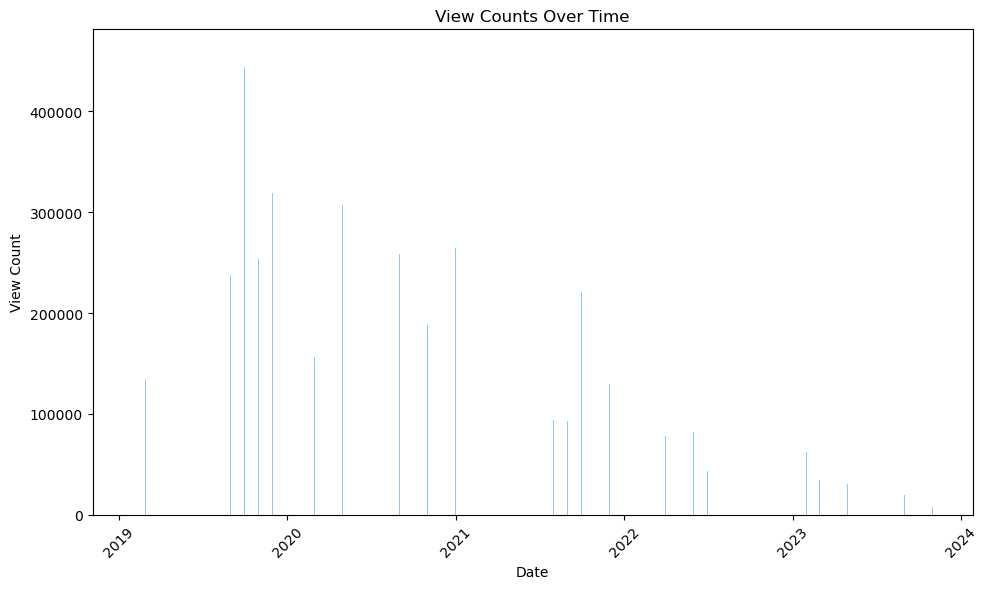

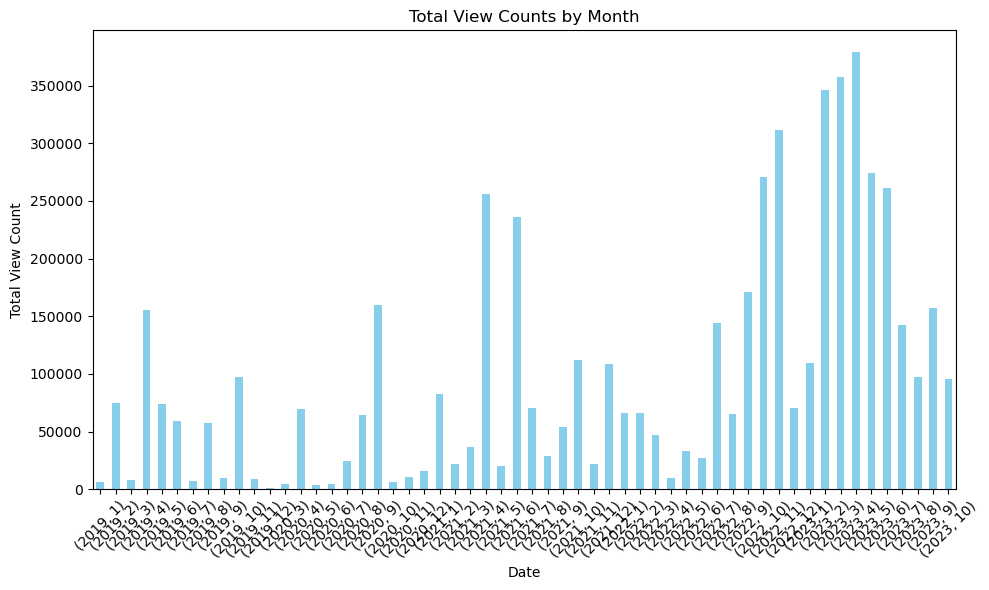

In [361]:
bootcamp_df['Date'] = pd.to_datetime(bootcamp_df[['Year', 'Month']].assign(day=1))
bootcamp_df.set_index('Date', inplace=True)

average_view_counts_by_month = bootcamp_df.groupby(['Year', 'Month'])['View Count'].sum()

average_view_counts_by_month.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total View Counts by Month')
plt.xlabel('Date')
plt.ylabel('Total View Count')
plt.xticks(rotation=45)
plt.tight_layout()

Empty DataFrame
Columns: [Channel Title, Published At, Video Title, Category Id, Description, Tags, Definition, Caption, LicensedContent, Projection, View Count, Like Count, Favorite Count, Comment Count, Tag Count, Description Length (characters), Description Length (words), Duration (seconds), Publish Date, Month, Year, Fully Vaccinated Rate, One Dose Rate, Up To Date Rate]
Index: []

[0 rows x 24 columns]


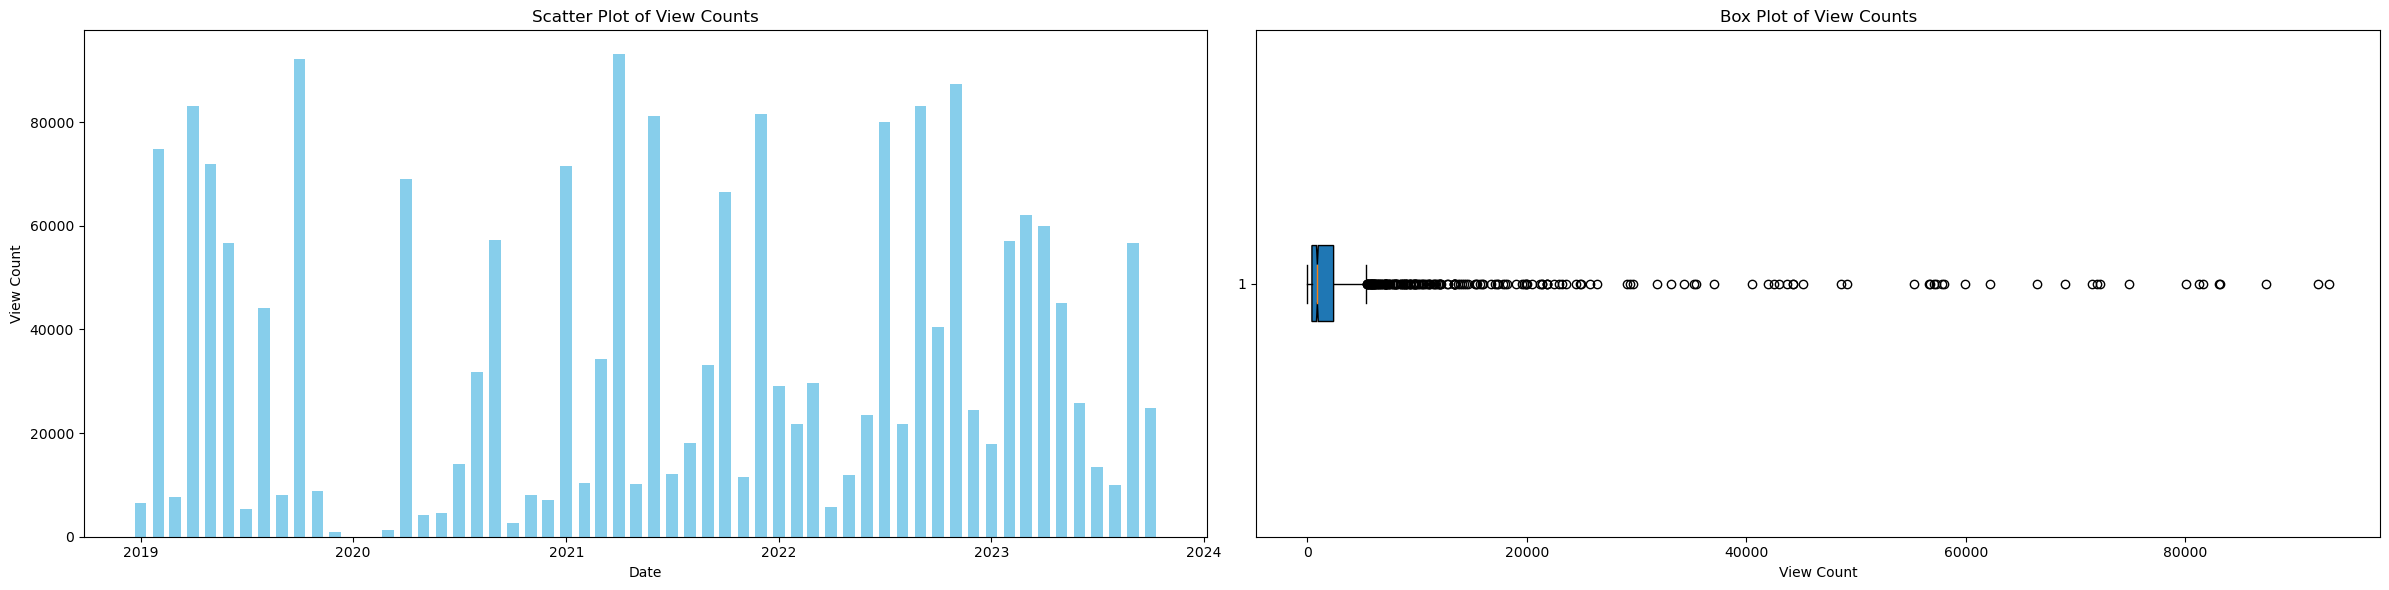

In [458]:
print(bootcamp_df[bootcamp_df["View Count"] == 18217638])
# Assuming you have already set 'Date' as the index and 'View Count' is the column you want to use
bootcamp_df = bootcamp_df[bootcamp_df["View Count"] < 18217638] # remove the outlier in 9/2021
# Scatter plot
plt.figure(figsize=(24, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot in position 1
plt.bar(bootcamp_df.index, bootcamp_df['View Count'], color='skyblue', width=20)
plt.title('Scatter Plot of View Counts')
plt.xlabel('Date')
plt.ylabel('View Count')

# Box plot
plt.subplot(1, 2, 2)  # plot in position 2
plt.boxplot(bootcamp_df['View Count'], vert=False, notch=True, patch_artist=True)
plt.title('Box Plot of View Counts')
plt.xlabel('View Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()




In [353]:
outlier_df = bootcamp_df[(bootcamp_df["Year"] == 2022) & (bootcamp_df["Month"] == 4)]

In [354]:
outlier_df["View Count"].max()

3928143

In [346]:
outlier_removed = bootcamp_df[bootcamp_df["View Count"] != 18217638]
outlier_removed

,Channel Title,Published At,Video Title,Category Id,Description,Tags,Definition,Caption,LicensedContent,Projection,...,Tag Count,Description Length (characters),Description Length (words),Duration (seconds),Publish Date,Month,Year,Fully Vaccinated Rate,One Dose Rate,Up To Date Rate
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-01,PushToProd,2021-11-10T21:55:44Z,Get CLOUD certified in 1 MONTH,27,How I passed my Microsoft Certified Solutions ...,"['Software', 'Networking', 'NOC', 'network ana...",hd,False,True,rectangular,...,35.0,137,21,767,2021-11-10,11,2021,0.6516,0.7195,0.0000
2021-11-01,PushToProd,2021-11-03T21:00:13Z,Getting into Tech | New Grad | Solutions Engineer,27,Hey Push to Prod Squad. Today I am interviewin...,"['Software', 'Networking', 'NOC', 'network ana...",hd,False,True,rectangular,...,35.0,276,48,668,2021-11-03,11,2021,0.6516,0.7195,0.0000
2023-02-01,Shane Hummus,2023-02-19T00:00:02Z,How To Get A BS Cloud Computing (Multi-Cloud) ...,27,BS Cloud Computing (Multi-Cloud) Degree WGU M...,"['Shane', 'Hummus', 'Shane Hummus', 'western g...",hd,False,True,rectangular,...,21.0,1168,175,943,2023-02-19,2,2023,0.7135,0.7902,0.1506
2023-02-01,Shane Hummus,2023-02-01T00:00:09Z,How Joseph Landed A Tech Sales Job In 1.5 Mont...,27,Troy’s Tech Sales Free Training (Get $50 off u...,"['Shane', 'Hummus', 'Shane Hummus', 'tech sale...",hd,False,True,rectangular,...,24.0,1066,167,1174,2023-02-01,2,2023,0.7135,0.7902,0.1506
2023-01-01,Shane Hummus,2023-01-24T00:00:13Z,How A Busy Husband And Wife Both Landed Tech J...,27,Troy’s Tech Sales Free Training:\nhttps://cour...,"['Shane', 'Shane Hummus', 'finance tips', 'car...",hd,False,True,rectangular,...,23.0,1038,162,1152,2023-01-24,1,2023,0.7131,0.7893,0.1446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,Black Heights - Advancing Your Career,2022-01-15T18:15:00Z,Bootcamp vs College Degree to get into TECH,27,Bootcamp vs College Degree to get into TECH\n\...,['Bootcamp vs College Degree to get into TECH'...,hd,False,True,rectangular,...,24.0,1938,172,1007,2022-01-15,1,2022,0.6978,0.7664,0.0001
2021-12-01,Black Heights - Advancing Your Career,2021-12-24T18:00:26Z,Tech Contractors Are Paid More But Don't Expec...,27,Tech Contractors Are Paid More But Don't Expec...,"[""Tech Contractors Are Paid More But Don't Exp...",hd,False,True,rectangular,...,26.0,2389,253,663,2021-12-24,12,2021,0.6789,0.7434,0.0000
2021-12-01,Black Heights - Advancing Your Career,2021-12-07T18:00:25Z,Coding Bootcamps - Transition from Military ...,27,Coding Bootcamps - Transition from Military ...,['coding bootcamps - transition from military ...,hd,False,True,rectangular,...,23.0,2288,233,979,2021-12-07,12,2021,0.6789,0.7434,0.0000


In [371]:
videos_by_year = bootcamp_df["Year"].value_counts()
videos_by_year

Year
2023    922
2022    271
2021    109
2020     66
2019     34
Name: count, dtype: int64

In [377]:
videos_by_year2 = video_df["Year"].value_counts()
videos_by_year2

Year
2023    6480
2022    6138
2021    4080
2020    2493
2019    1552
Name: count, dtype: int64

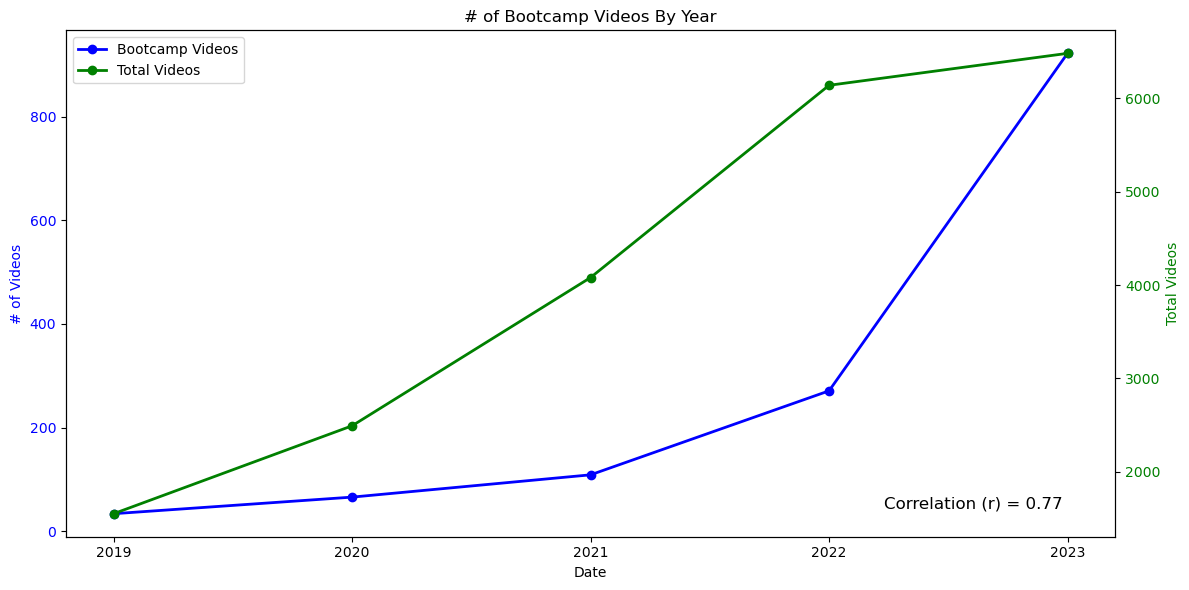

In [457]:
# Create a figure and two subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first set of data (Bootcamp Videos) on the first axis
ax1.plot(videos_by_year.index, videos_by_year.values, marker='o', color='blue', linestyle='-', linewidth=2, label='Bootcamp Videos')
ax1.set_xlabel('Date')
ax1.set_ylabel('# of Videos', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('# of Bootcamp Videos By Year')

# Create a second y-axis for the second dataset (Total Videos)
ax2 = ax1.twinx()
ax2.plot(videos_by_year2.index, videos_by_year2.values, marker='o', color='green', linestyle='-', linewidth=2, label='Total Videos')
ax2.set_ylabel('Total Videos', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Calculate the correlation coefficient (r value)
correlation = np.corrcoef(videos_by_year.values, videos_by_year2.values)[0, 1]

# Add r value as text in the bottom right corner
ax2.text(0.95, 0.05, f'Correlation (r) = {correlation:.2f}', transform=ax2.transAxes, fontsize=12,
        verticalalignment='bottom', horizontalalignment='right', color='black')

# Set x-axis locator and formatter
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()


In [401]:
california_df

,County,Year,Month,Fully Vaccinated Rate,One Dose Rate,Up To Date Rate
Date,,,,,,
2019-01-01,All CA Counties,2019,1,0.0000,0.0000,0.0000
2019-02-01,All CA Counties,2019,2,0.0000,0.0000,0.0000
2019-03-01,All CA Counties,2019,3,0.0000,0.0000,0.0000
2019-04-01,All CA Counties,2019,4,0.0000,0.0000,0.0000
2019-05-01,All CA Counties,2019,5,0.0000,0.0000,0.0000
2019-06-01,All CA Counties,2019,6,0.0000,0.0000,0.0000
2019-07-01,All CA Counties,2019,7,0.0000,0.0000,0.0000
2019-08-01,All CA Counties,2019,8,0.0000,0.0000,0.0000
2019-09-01,All CA Counties,2019,9,0.0000,0.0000,0.0000


In [421]:
channel_df = video_df[video_df["Channel Title"] == "thedevlife"]

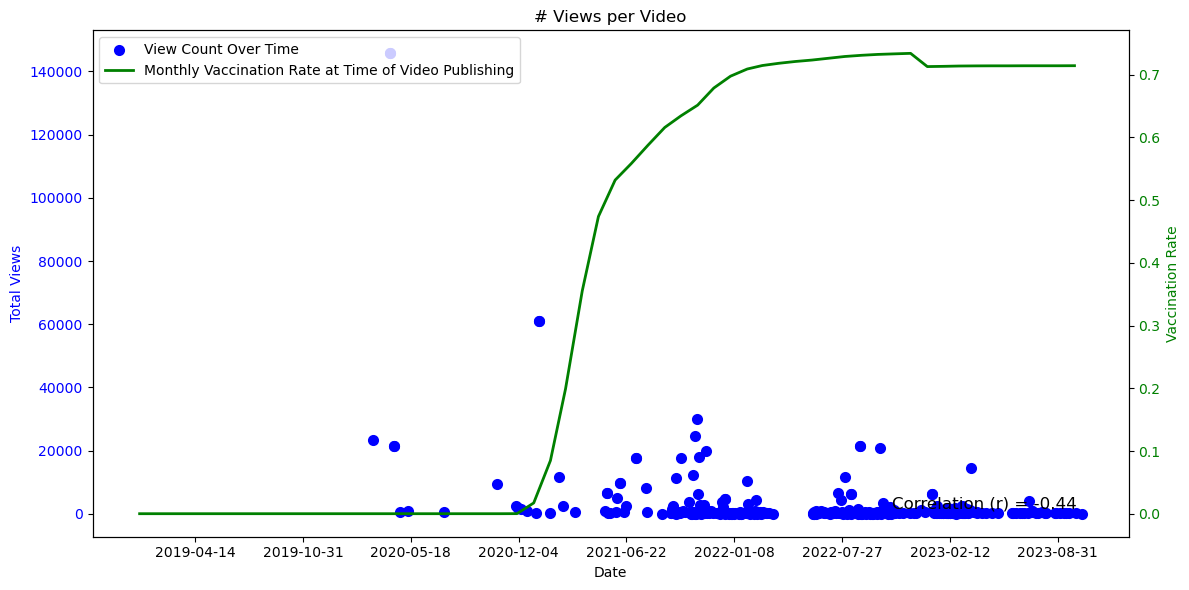

In [423]:
# Create a figure and two subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first set of data (Bootcamp Videos) on the first axis
ax1.scatter(channel_df["Publish Date"], channel_df["View Count"], marker='o', color='blue', linestyle='-', linewidth=2, label='View Count Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Views', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('# Views per Video')

# Create a second y-axis for the second dataset (Total Videos)
ax2 = ax1.twinx()
ax2.plot(california_df.index, california_df["Fully Vaccinated Rate"], color='green', linestyle='-', linewidth=2, label="Monthly Vaccination Rate at Time of Video Publishing")
ax2.set_ylabel('Vaccination Rate', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Calculate the correlation coefficient (r value)
correlation = np.corrcoef(channel_df["View Count"], channel_df["Fully Vaccinated Rate"])[0, 1]

# Add r value as text in the bottom right corner
ax2.text(0.95, 0.05, f'Correlation (r) = {correlation:.2f}', transform=ax2.transAxes, fontsize=12,
        verticalalignment='bottom', horizontalalignment='right', color='black')

# Set x-axis locator and formatter
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()


In [419]:
correlations = {}
for channel in video_df["Channel Title"].unique():
    correlations[channel] = np.corrcoef(video_df[video_df["Channel Title"] == channel]["View Count"], video_df[video_df["Channel Title"] == channel]["Fully Vaccinated Rate"])[0, 1]

In [420]:
correlations

{'PushToProd': -0.37413120330465827,
 'Shane Hummus': -0.1766080806466975,
 'thedevlife': -0.44225022632597816,
 'Thu Vu data analytics': 0.28219723378461375,
 'Dorian Develops': 0.06776106650170714,
 'Sandra - Tech & Lifestyle': -0.022254669286182794,
 'Uma Abu': 0.01314301219246143,
 'Boyd Clewis: The Six-Figure Tech Career Coach': 0.07550818897687597,
 'mayuko': -0.22578261946322728,
 'Internet Made Coder': -0.11736467458137065,
 'Coding with Lewis': 0.11283564527292511,
 'Stefan Mischook': -0.08630814741958871,
 'CareerFoundry': -0.17939787692510709,
 'Rahul Pandey': 0.2695967524548765,
 'TechWorld with Nana': -0.004319728309079379,
 'UnixGuy | Cyber Security Career ': 0.09403699061048393,
 'BABE ENGINEER': 0.05527112888658529,
 'TechLead': -0.3005535833660388,
 'freeCodeCamp.org': -0.1808714455299489,
 'Data With Mo': -0.20925726556472182,
 'Jeremiah Peoples': -0.16614912002140342,
 'My Lesson': 0.10874134747359201,
 'Rohan Adus': 0.10519728770300378,
 'IT Career Questions': -0.01

In [426]:
#https://stackoverflow.com/questions/44664247/python-dictionary-how-to-get-all-keys-with-specific-values
strong_corr = [k for k,v in correlations.items() if (float(v) >= .5) or (float(v) <= -.5)]
medium_corr = [k for k,v in correlations.items() if (float(v) >= .3 and float(v) < .5) or (float(v) <= -.3 and float(v) >= -.5)]
weak_corr = [k for k,v in correlations.items() if (float(v) >= 0 and float(v) < .3) or (float(v) <= 0 and float(v) >= -.3)]

In [427]:
strong_corr

[]

In [428]:
medium_corr

['PushToProd', 'thedevlife', 'TechLead', 'A Life Engineered', 'Devslopes']

In [ ]:
# next steps, plot just the trend lines of the medium correlation vs covid vaccination rates (fully and partially)

In [434]:
correlations2 = {}
for channel in video_df["Channel Title"].unique():
    correlations2[channel] = np.corrcoef(video_df[video_df["Channel Title"] == channel]["View Count"], video_df[video_df["Channel Title"] == channel]["One Dose Rate"])[0, 1]

In [435]:
correlations2

{'PushToProd': -0.3743459908316764,
 'Shane Hummus': -0.17755015180546652,
 'thedevlife': -0.4485709627494402,
 'Thu Vu data analytics': 0.2818264668214726,
 'Dorian Develops': 0.06364714469180952,
 'Sandra - Tech & Lifestyle': -0.015368178088428093,
 'Uma Abu': 0.0001535750168718844,
 'Boyd Clewis: The Six-Figure Tech Career Coach': 0.06711129682105624,
 'mayuko': -0.2141521578095239,
 'Internet Made Coder': -0.20359358075247314,
 'Coding with Lewis': 0.10428965783699301,
 'Stefan Mischook': -0.08336193989839182,
 'CareerFoundry': -0.15203086666025956,
 'Rahul Pandey': 0.27103846061967385,
 'TechWorld with Nana': 0.007141118249025422,
 'UnixGuy | Cyber Security Career ': 0.11232893563981992,
 'BABE ENGINEER': 0.04248476727518849,
 'TechLead': -0.2978683660501035,
 'freeCodeCamp.org': -0.18043011456062127,
 'Data With Mo': -0.30997812787737355,
 'Jeremiah Peoples': -0.17332115950285523,
 'My Lesson': 0.1210001138192145,
 'Rohan Adus': 0.08503210675087072,
 'IT Career Questions': -0.002

In [451]:
strong_corr2 = [(k,v) for k,v in correlations2.items() if (float(v) >= .5) or (float(v) <= -.5)]
medium_corr2 = [(k,v) for k,v in correlations2.items() if (float(v) >= .3 and float(v) < .5) or (float(v) <= -.3 and float(v) >= -.5)]
weak_corr2 = [(k,v) for k,v in correlations2.items() if (float(v) >= 0 and float(v) < .3) or (float(v) <= 0 and float(v) >= -.3)]

In [452]:
strong_corr2

[]

In [453]:
medium_corr2

[('PushToProd', -0.3743459908316764),
 ('thedevlife', -0.4485709627494402),
 ('Data With Mo', -0.30997812787737355),
 ('A Life Engineered', -0.401013007486235),
 ('Devslopes', -0.3414891099778587)]

In [439]:
correlations3 = {}
for channel in video_df["Channel Title"].unique():
    correlations3[channel] = np.corrcoef(video_df[video_df["Channel Title"] == channel]["View Count"], video_df[video_df["Channel Title"] == channel]["Up To Date Rate"])[0, 1]

In [454]:
strong_corr3 = [(k,v) for k,v in correlations3.items() if (float(v) >= .5) or (float(v) <= -.5)]
medium_corr3 = [(k,v) for k,v in correlations3.items() if (float(v) >= .3 and float(v) < .5) or (float(v) <= -.3 and float(v) >= -.5)]
weak_corr3 = [(k,v) for k,v in correlations3.items() if (float(v) >= 0 and float(v) < .3) or (float(v) <= 0 and float(v) >= -.3)]

In [455]:
strong_corr3

[]

In [456]:
medium_corr3

[('PushToProd', -0.3283344101870942),
 ('My Lesson', 0.39175511695241544),
 ('Jack Ross', -0.42201593264718684),
 ('A Life Engineered', -0.49599592248318647)]